# Chipotle Sales Analysis

1. Dataset Check
    - Importing dataset
    - Checking rows and columns
    - Checking statistical info per columns

2. Visualization
    - What is the most ordered menu?
    - Number of total order per menu.

3. Data Cleaning

4. Data Analysis
    - What is the average dollar spent per order?
    - What are prices per menu?
    - What is the most expensive order and how many items were sold in that order?
    - Is 'Veggie Salad Bowl' selling enough to be kept on the menu?
    - How many times did customer order more than one 'Chicken Bowl'?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
import os
os.getcwd()

'c:\\Users\\davki\\Data Study\\Chipotle'

#### 1. Dataset Check

In [4]:
# Importing chipotle.csv file
chipotle = pd.read_csv('chipotle.tsv', sep = '\t')

In [13]:
print(chipotle.info())
print('----------------------------------------------')
print(chipotle.describe())
print('----------------------------------------------')
print(chipotle.isnull().sum())
print('----------------------------------------------')
chipotle['order_id'] = chipotle['order_id'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
----------------------------------------------
          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000
----------------------------------------------
order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price 

#### 2. Visualization

In [14]:
# How many items are in the dataset?
print('there are ', len(chipotle.item_name.unique()),' items in the dataset')

there are  50  items in the dataset


In [15]:
# Top 10 the most sold items
item_top10 = chipotle.groupby('item_name')['quantity'].sum().sort_values(ascending=False)[:10]
for i, (val,cnt) in enumerate(item_top10.items(),1):
    print('TOP ',i,": ",cnt,val)

TOP  1 :  761 Chicken Bowl
TOP  2 :  591 Chicken Burrito
TOP  3 :  506 Chips and Guacamole
TOP  4 :  386 Steak Burrito
TOP  5 :  351 Canned Soft Drink
TOP  6 :  230 Chips
TOP  7 :  221 Steak Bowl
TOP  8 :  211 Bottled Water
TOP  9 :  130 Chips and Fresh Tomato Salsa
TOP  10 :  126 Canned Soda


In [16]:
# Number of orders per items (Top 10)
order_number = chipotle.groupby('item_name')['order_id'].count()
print(order_number)

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


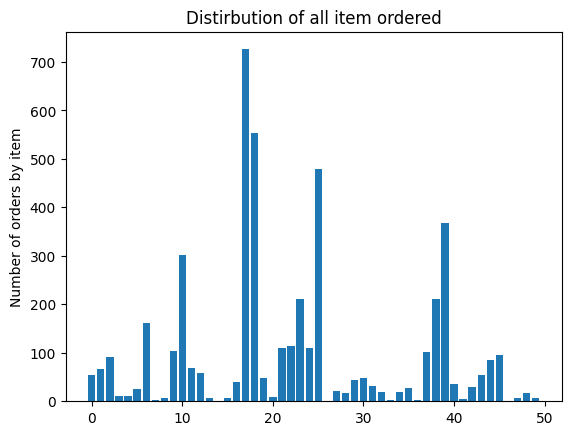

In [17]:
# Visualization of total order
x_1 = order_number.values
y_1 = order_number.values.tolist()
plt.bar(np.arange(len(x_1.tolist())),y_1, align= 'center')
plt.ylabel('Number of orders by item')
plt.title ('Distirbution of all item ordered')
plt.show()

#### 3. Data Cleaning

In [18]:
# Removing $ sign in item_price column
chipotle['item_price'] = chipotle['item_price'].apply( lambda x: float(x[1:]))

In [19]:
print(chipotle.info())
print('----------------------------------------------')
print(chipotle.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB
None
----------------------------------------------
          quantity   item_price
count  4622.000000  4622.000000
mean      1.075725     7.464336
std       0.410186     4.245557
min       1.000000     1.090000
25%       1.000000     3.390000
50%       1.000000     8.750000
75%       1.000000     9.250000
max      15.000000    44.250000


#### 4. Data Analysis

In [28]:
# What is the average dollar spent per order?
average_dollar = chipotle.groupby('order_id')['item_price'].sum().mean()
print('Average dollar spent per order is $',round(average_dollar,2))

Average dollar spent per order is $ 18.81


In [48]:
# What are prices per menu?
price_per_menu = chipotle.groupby('item_name')['item_price'].agg(lambda x: x.mode().iloc[0])
filtered_menu = price_per_menu[
    price_per_menu.index.str.contains('Bowl|Burrito|Taco|Tacos|Salad', case=False)
    ]

print(filtered_menu)


item_name
Barbacoa Bowl             9.25
Barbacoa Burrito          9.25
Barbacoa Crispy Tacos     9.25
Barbacoa Salad Bowl       9.39
Barbacoa Soft Tacos       9.25
Bowl                      7.40
Burrito                   7.40
Carnitas Bowl             9.25
Carnitas Burrito          9.25
Carnitas Crispy Tacos     8.99
Carnitas Salad            8.99
Carnitas Salad Bowl      11.89
Carnitas Soft Tacos       9.25
Chicken Bowl              8.75
Chicken Burrito           8.75
Chicken Crispy Tacos      8.75
Chicken Salad             8.49
Chicken Salad Bowl        8.75
Chicken Soft Tacos        8.75
Crispy Tacos              7.40
Salad                     7.40
Steak Bowl               11.75
Steak Burrito             8.99
Steak Crispy Tacos        9.25
Steak Salad               8.99
Steak Salad Bowl         11.89
Steak Soft Tacos          9.25
Veggie Bowl              11.25
Veggie Burrito            8.49
Veggie Crispy Tacos       8.49
Veggie Salad              8.49
Veggie Salad Bowl        11.2

In [63]:
# What is the most expensive order and how many items were sold in that order?
most_expensive_order = chipotle.groupby('order_id').sum().sort_values(by='item_price', ascending=False)
print(most_expensive_order[['quantity', 'item_price']].head(5))


          quantity  item_price
order_id                      
926             23      205.25
1443            35      160.74
1483            14      139.00
691             11      118.25
1786            20      114.30


In [70]:
# How many times did customer order more than one 'Chicken Bowl'?
chicken_bowl = chipotle[chipotle['item_name'].str.contains('Chicken Bow',case =False)]
filtered_chicken_bowl = chicken_bowl[chicken_bowl['quantity']>=2]['item_name'].count()
print('There were a total of ',filtered_chicken_bowl,' orders  that included two or more servings of the Chicken Bowl menu item.' )

There were a total of  33  orders  that included two or more servings of the Chicken Bowl menu item.
